# Purpose: Experimenting with using the ZScale algorithm for normalization. I then sped this method up by implementing the algorithm with a GPU in the notebook "Image Normalization With GPU", but ultimately switched to using the image background for normalization.

In [1]:
from astropy.io import fits
import glob
import matplotlib.pyplot as plt
import matplotlib
from astropy.visualization import LinearStretch, ZScaleInterval, ImageNormalize
import numpy as np
import random
matplotlib.rc('image', cmap='gray')

In [38]:
def normalize(arr):
    vmin, vmax = ZScaleInterval(10000).get_limits(arr)
    arr -= vmin
    arr /= vmax - vmin
    arr = np.clip(arr, 0, 1)
    return (arr - 0.5) * 2

def convert_sci_to_ref(file):
    info = file.split("_")[3:-1]
    return "/media/rd1/ztf_neos/training_examples/resampled/ztf_" + "_".join(info[1:4] + info[5:6]) + "_refimg.resamp.fits"

In [9]:
filenames = glob.glob("/media/rd1/ztf_neos/training_examples/resampled/*")
filename_pairs = [(file, convert_sci_to_ref(file)) for file in filenames if "sciimg.resamp.fits" in file]

random.shuffle(filename_pairs)

In [10]:
sci, ref = random.choice(filename_pairs)
sci, ref = fits.getdata(sci), fits.getdata(ref)

In [24]:
%%timeit
normalize(sci)

364 ms ± 295 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


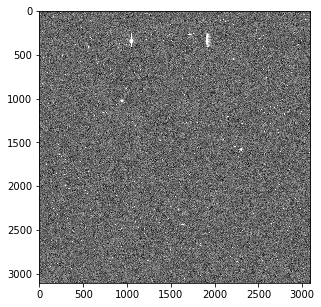

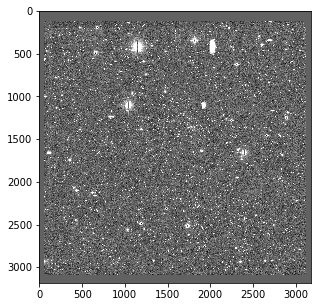

In [39]:
plt.figure(figsize=(5,5))
plt.imshow(normalize(sci))
plt.figure(figsize=(5,5))
plt.imshow(normalize(ref))

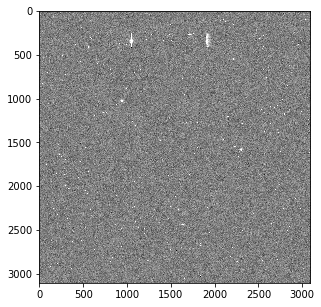

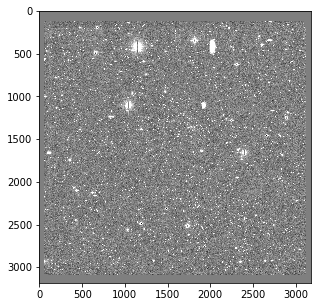

In [37]:
plt.figure(figsize=(5,5))
plt.imshow(normalize(sci))
plt.figure(figsize=(5,5))
plt.imshow(normalize(ref))